# DAGGER - A toolkit to create and run computation graphs
The purpose of this library is to streamline the creation of a calculation engine based on specified entry points, such as:
- (Implemented) A Python codebase with a class with multiple inter-dependent functions: one per calculation to be performed. Some function inputs include outputs of other functions
- (Coming soon) Directly from a pre-defined Excel template or form
- (Coming later) Directly from an existing Excel-based model containing complex inter-dependencies and relationships

Dagger was created because the process of reverse-engineering domain-specific calculations into a codebase is time-consuming and can be difficult to audit for anyone except the developers. This codebase is intended to streamline the creation of a python deterministic model from a list of calculations. Rapidly converting these to a graph makes the process of creating the model, auditing it and communicating results more streamlined, especially with a back-and-forth with a domain expert is required.

## How it works
There are two main classes: `GraphFactory` and `GraphRunner`. The former creates the graph structure, but does not run the model. The latter runs the model to run the computations and generate outputs

In [ ]:
from py_formulas import RealEstateFormulas, EngineeringFormulas
from computation_graph import GraphFactory, GraphRunner

# GraphFactory

The `GraphFactory` class creates a graph from code. The code must meet these conditions:
- Each computation or formula for which an output should be inspected is a single public function (no leading underscore)
- Methods must be contained in a single class with no __init__ method
- Methods must be static (no input of `self` is supported at this point)
- Names for a method must match its corresponding argument in a downstream method (i.e., in the test example provided )

In [ ]:
# Create a graph from formulas in the class RealEstateFormulas
gf = GraphFactory()
gf.build_graph_from_code(RealEstateFormulas)


## Visualize graph structure

In [ ]:
from visualization import visualize_graph_dot, visualize_graph_nx

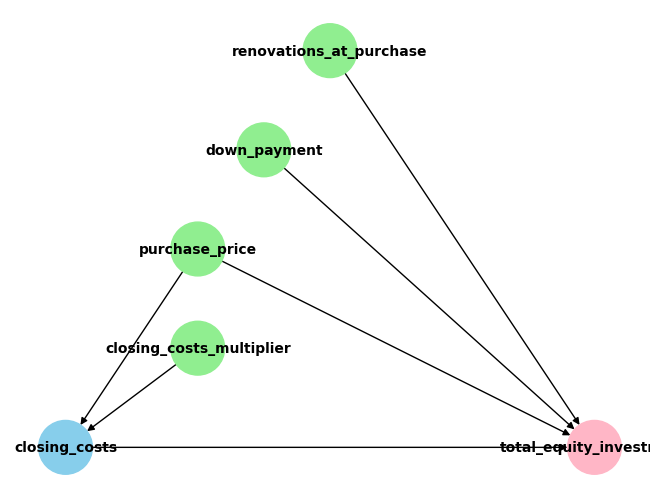

In [ ]:
# Visualize with native nx plotter
visualize_graph_nx(gf.G)

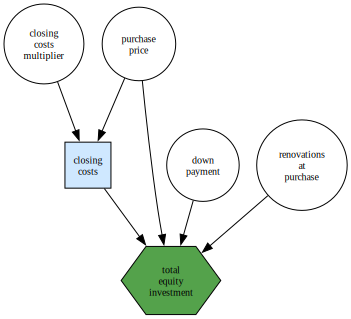

In [ ]:
# Visualize using pygraphviz (requires local Graphviz binaries on machine)
visualize_graph_dot(gf.G, fontsize=10, orienation="TB")

# GraphRunner

In [6]:
from computation_graph import GraphRunner

inputs = dict(
    purchase_price = 300000,
    closing_costs_multiplier = 0.02,
    # tax_rate = 0.0186,
    down_payment = 65000,
    renovations_at_purchase = 15000,
)

model = GraphRunner(gf, inputs)

In [7]:
model.run()

In [8]:
# To get calculated results, run this without arguments or pass a list of result names to get just those
model.query_results()

{'closing_costs': 6000.0,
 'total_equity_investment': 20865000000.0,
 'purchase_price': 300000,
 'closing_costs_multiplier': 0.02,
 'down_payment': 65000,
 'renovations_at_purchase': 15000}

In [9]:
model.query_results()

{'closing_costs': 6000.0,
 'total_equity_investment': 20865000000.0,
 'purchase_price': 300000,
 'closing_costs_multiplier': 0.02,
 'down_payment': 65000,
 'renovations_at_purchase': 15000}